# k-Nearest Neighbors (KNN) Classification Example

## Overview:
This script demonstrates the implementation of k-Nearest Neighbors (KNN) classification on a red wine dataset. It includes functions to calculate distances, predict labels, and evaluate classification error.

##Dataset
Here's a description of the columns in the dataset:

1. **fixed acidity:** The amount of fixed acids in the wine, contributing to its overall acidity.
2. **volatile acidity:** The amount of volatile acids in the wine, which can impart a vinegar-like taste.
3. **citric acid:** The amount of citric acid in the wine, providing freshness and flavor.
4. **residual sugar:** The amount of residual sugar left in the wine after fermentation.
5. **chlorides:** The amount of salts in the wine, contributing to its taste and mouthfeel.
6. **free sulfur dioxide:** The amount of free sulfur dioxide, which acts as an antioxidant and preservative.
7. **total sulfur dioxide:** The total amount of sulfur dioxide, including both free and bound forms.
8. **density:** The density of the wine, which is related to its alcohol content.
9. **pH:** The acidity or basicity level of the wine.
10. **sulphates:** The amount of sulfates in the wine, contributing to its taste and aroma.
11. **alcohol:** The alcohol content of the wine.
12. **quality:** The quality of the wine, typically rated on a scale from 1 to 10, where higher values indicate better quality.

The dataset is well-organized with numerical features representing various chemical properties of red wines and a quality score indicating the perceived quality of each wine sample. It's a common type of dataset used for wine quality prediction and analysis.

##Code Structure:
1. Data Loading: Reads and preprocesses a red wine dataset for classification.
2. KNN Functions: Implements core functions for KNN, including distance calculation, prediction, and error evaluation.
3. Hyperparameter Tuning: Explores different values of k and evaluates classification errors.
4. Visualization: Plots the classification errors against different values of k for analysis.

##KNN Algorithm Overview:
KNN is a non-parametric, lazy supervised learning algorithm used for classification and regression. In KNN, a data point is classified by the majority class of its k nearest neighbors. The algorithm is based on the assumption that similar instances tend to exist in close proximity in the feature space.


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation and analysis
import seaborn as sns  # Seaborn for statistical data visualization
from sklearn.model_selection import train_test_split #for splitting dataset

In [2]:
#Load the dataset
wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv',
                 sep=';',
                 error_bad_lines=False,
                 engine='python')

<ipython-input-2-2d999c49601f>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv',


In [4]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


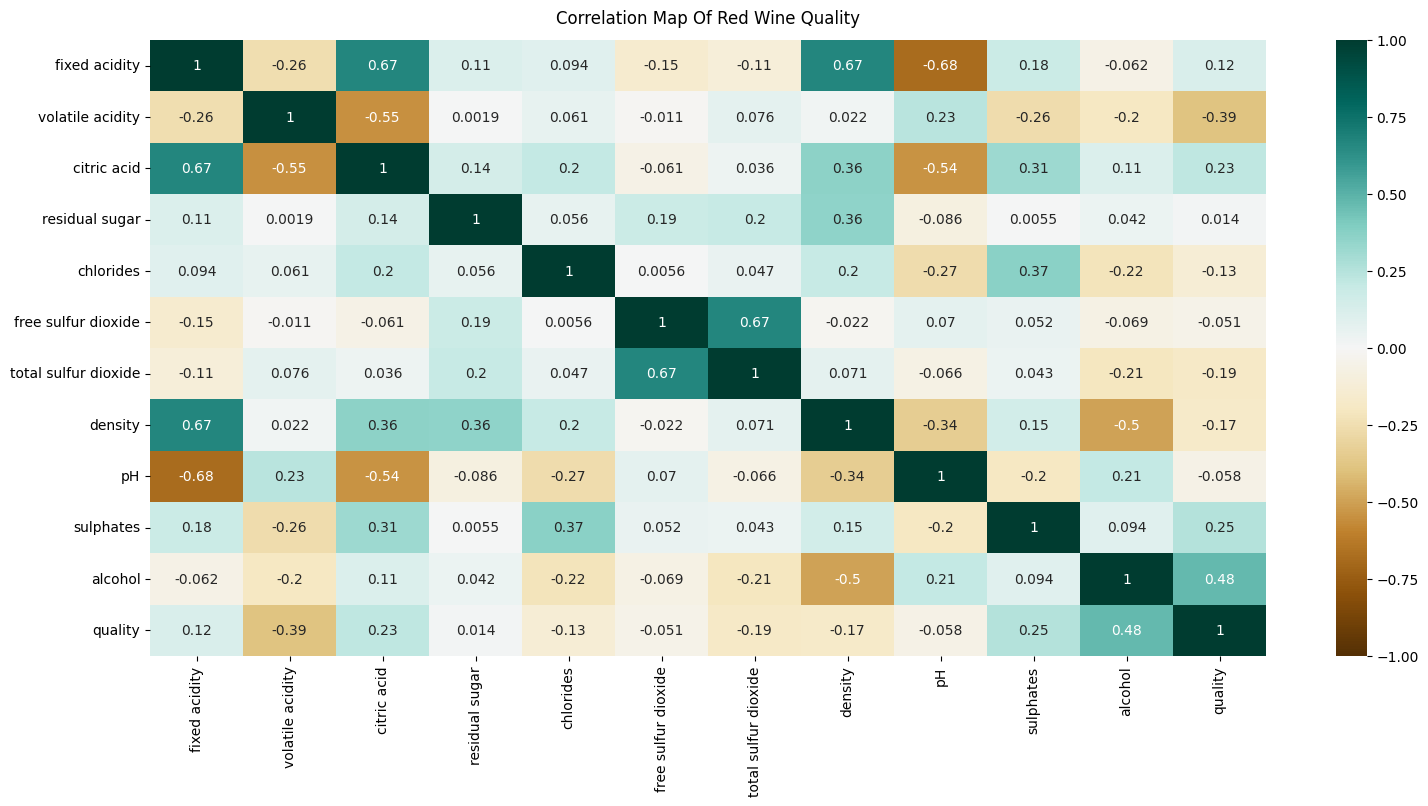

In [5]:
# Set up a figure for the heatmap with a specified size
plt.figure(figsize=(18, 8))

# Create a heatmap of the correlation matrix for the red wine data
sns.heatmap(wine.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set the title for the heatmap
plt.title('Correlation Map Of Red Wine Quality', fontdict={'fontsize': 12}, pad=12);

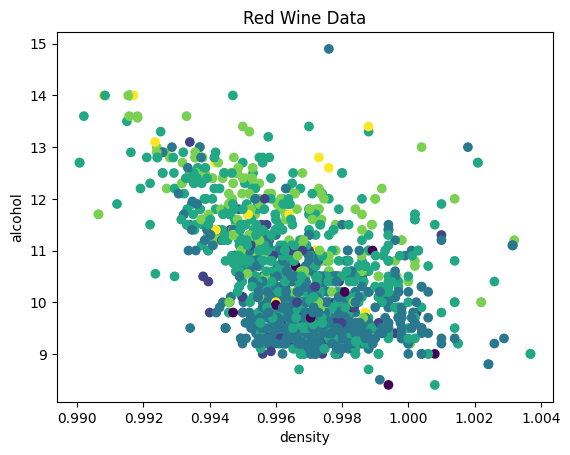

In [6]:
# Select specific columns ('density', 'alcohol', 'quality') from the red wine DataFrame
data = wine[['density', 'alcohol', 'quality']]

# Create a scatter plot using Matplotlib
plt.scatter(data['density'], data['alcohol'], c=data['quality'])

# Set labels for the axes
plt.xlabel('density')  # X-axis label
plt.ylabel('alcohol')  # Y-axis label

# Set the title of the scatter plot
plt.title('Red Wine Data')

# Display the scatter plot
plt.show()

<ipython-input-7-ee4e125df696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['quality'] = np.where(data['quality'] > 6, 1, 0)


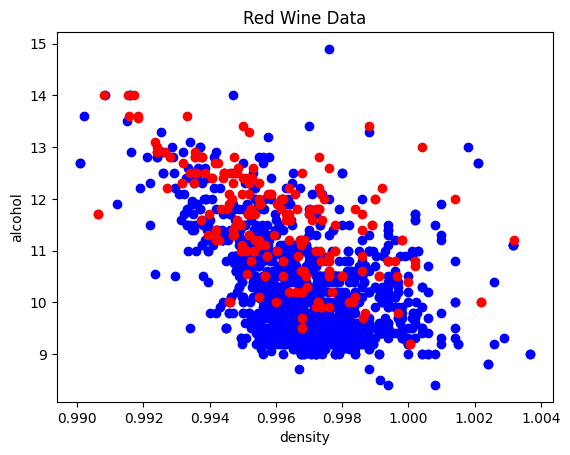

In [7]:
# Update the 'quality' column in the DataFrame based on a condition
# - If 'quality' is greater than 6, set it to 1; otherwise, set it to 0
data['quality'] = np.where(data['quality'] > 6, 1, 0)

# Extract data points where 'quality' is 0 (blue points)
plot_data_1 = data[data['quality'] == 0]
plt.scatter(plot_data_1['density'], plot_data_1['alcohol'], c='b')

# Extract data points where 'quality' is 1 (red points)
plot_data_2 = data[data['quality'] == 1]
plt.scatter(plot_data_2['density'], plot_data_2['alcohol'], c='r')

# Set labels for the axes
plt.xlabel('density')  # X-axis label
plt.ylabel('alcohol')  # Y-axis label

# Set the title of the scatter plot
plt.title('Red Wine Data')

# Display the scatter plot
plt.show()

In [9]:
# Extract features (X) and target variable (y) from the DataFrame
X = data.drop(['quality'], axis=1).to_numpy()  # Features (independent variables)
y = data['quality'].to_numpy()  # Target variable (dependent variable)

# Split the data into training and testing sets using scikit-learn's train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
def distance(p, q):
    """Calculate the Euclidean distance between two points.

    Parameters:
    - p (numpy.ndarray): The coordinates of the first point.
    - q (numpy.ndarray): The coordinates of the second point.

    Returns:
    - float: The Euclidean distance between the two points.
    """
    return np.sqrt((p - q) @ (p - q))

In [11]:
def k_nearest_neighbors(point,
                        training_features,
                        training_labels,
                        k):
    """Perform k-nearest neighbors classification.

    Parameters:
    - point (numpy.ndarray): The coordinates of the point to classify.
    - training_features (numpy.ndarray): The feature matrix of the training dataset.
    - training_labels (numpy.ndarray): The labels corresponding to the training features.
    - k (int): The number of neighbors to consider in the classification.

    Returns:
    - list: A list of k nearest neighbors, each represented as [feature_vector, label, distance].
    """
    # Create an empty list to store neighbors and distances
    neighbors = []

    # Loop through each training feature and label to calculate distances
    for p, label in zip(training_features, training_labels):
        # Calculate the Euclidean distance between the given point and the current training feature
        d = distance(point, p)

        # Create a temporary data structure to store the feature vector, label, and distance
        temp_data = [p, label, d]

        # Append the temporary data to the list of neighbors
        neighbors.append(temp_data)

    # Sort the list of neighbors based on distances in ascending order
    neighbors.sort(key=lambda x: x[-1])

    # Return the top k nearest neighbors
    return neighbors[:k]

In [12]:
def KNN_Predict(point, training_features, training_labels, k, regression=False):
    """
    Perform k-nearest neighbors prediction for classification or regression.

    Parameters:
    - point (numpy.ndarray): The coordinates of the point to predict.
    - training_features (numpy.ndarray): The feature matrix of the training dataset.
    - training_labels (numpy.ndarray): The labels corresponding to the training features.
    - k (int): The number of neighbors to consider in the prediction.
    - regression (bool): If True, perform regression; if False, perform classification.

    Returns:
    - int/float: The predicted label or regression value for the given point.
    """
    # Find the k nearest neighbors using the k_nearest_neighbors function
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)

    # Classification
    if not regression:
        # Extract labels from neighbors
        labels = [x[1] for x in neighbors]
        # Return the most common label among the k nearest neighbors
        return max(labels, key=labels.count)

    # Regression
    else:
        # Calculate the average of the labels for regression
        return sum(x[1] for x in neighbors) / k

In [13]:
# Classification Error Calculation Function
def classification_error(test_features, test_labels, training_features, training_labels, k):
    """
    Calculate the classification error for k-nearest neighbors.

    Parameters:
    - test_features (numpy.ndarray): The feature matrix of the test dataset.
    - test_labels (numpy.ndarray): The true labels corresponding to the test features.
    - training_features (numpy.ndarray): The feature matrix of the training dataset.
    - training_labels (numpy.ndarray): The true labels corresponding to the training features.
    - k (int): The number of neighbors to consider in the prediction.

    Returns:
    - float: The classification error (percentage of misclassified instances) for the given k.
    """
    # Initialize error count
    error = 0

    # Iterate through each test instance and its true label
    for point, label in zip(test_features, test_labels):
        # Increment error if the predicted label is not equal to the true label
        error += label != KNN_Predict(point, training_features, training_labels, k)

    # Calculate the classification error as the ratio of misclassified instances to the total
    return error / len(test_features)

In [14]:
K = 5
classification_error(X_test, y_test, X_train, y_train, 5)

0.13125

In [15]:
# Generate a list of possible values for k in the range [3, 5, ..., 25]
possible_k = [k for k in range(3, 26, 2)]

# Calculate classification errors for each value of k using list comprehension
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]

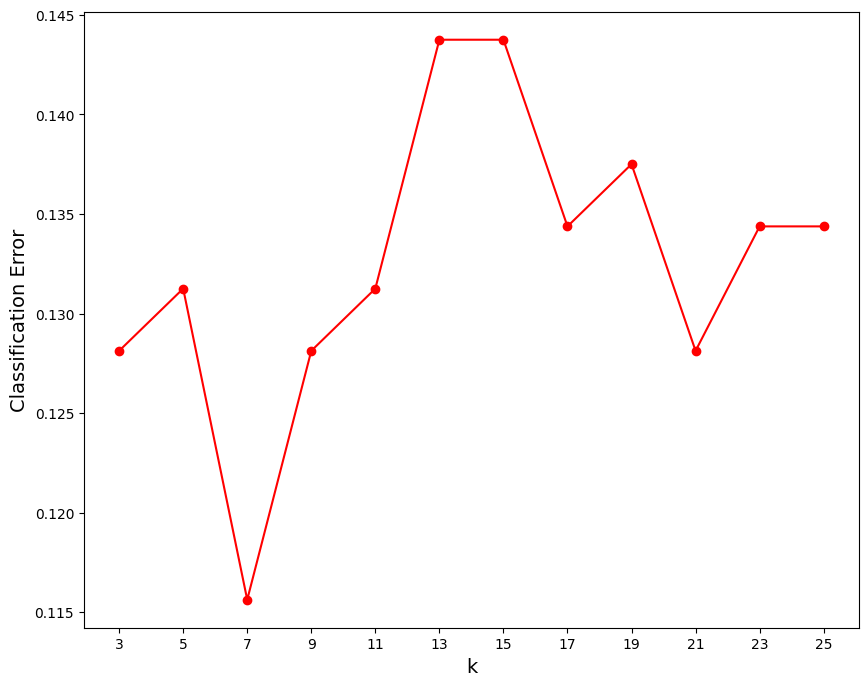

In [16]:
# Set up a figure for the plot with a specified size
plt.figure(figsize=(10, 8))

# Plot the classification errors against different values of k
plt.plot(possible_k, errors, color='red', marker="o")

# Set labels for the axes
plt.xlabel('k', fontsize=14)  # X-axis label
plt.ylabel('Classification Error', fontsize=14)  # Y-axis label

# Set the x-axis ticks to display all possible values of k
plt.xticks(possible_k)

# Display the plot
plt.show()

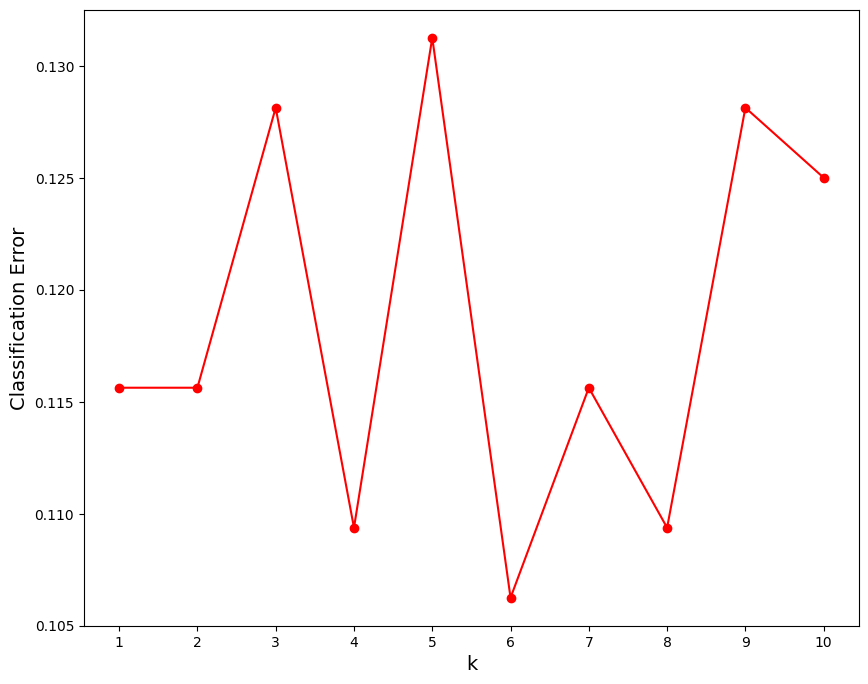

In [18]:
# Generate a list of possible values for k in the range [1, 2, ..., 10]
possible_k = [x for x in range(1, 11, 1)]

# Calculate classification errors for each value of k using list comprehension
error_rate = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]

# Set up a figure for the plot with a specified size
plt.figure(figsize=(10, 8))

# Plot the classification errors against different values of k
plt.plot(possible_k, error_rate, color='red', marker="o")

# Set labels for the axes
plt.xlabel('k', fontsize=14)  # X-axis label
plt.ylabel('Classification Error', fontsize=14)  # Y-axis label

# Set the x-axis ticks to display all possible values of k
plt.xticks(possible_k)

# Display the plot
plt.show()

### Conclusion:

### KNN Overview:

- **Strengths:**
  - Simple and intuitive algorithm.
  - No assumptions about the underlying data distribution.
  - Versatile for both classification and regression tasks.

- **Considerations:**
  - Sensitive to the choice of k and distance metric.
  - Computationally expensive for large datasets, as it requires calculating distances to all data points.

- **Use Cases:**
  - KNN is suitable for smaller datasets with clear decision boundaries.
  - It's effective when the underlying data distribution is locally homogeneous.

- **Trade-offs:**
  - The algorithm can be sensitive to outliers and irrelevant features.
  - As k increases, the model becomes less sensitive to noise but may lose accuracy.

In conclusion, the code provides a practical implementation of KNN for red wine quality prediction, offering insights into the impact of different values of k on classification accuracy. We can observe that the classification error is lowest when k=6.